# Reto 2: Regex (Re-loaded)

## 1. Objetivos:
* Practicar expresiones regulares con un conjunto de datos real
* Validar qué regex permite tener el mejor performance
* Validar qué bloques de código tienen mejor performance vs formas alternativas

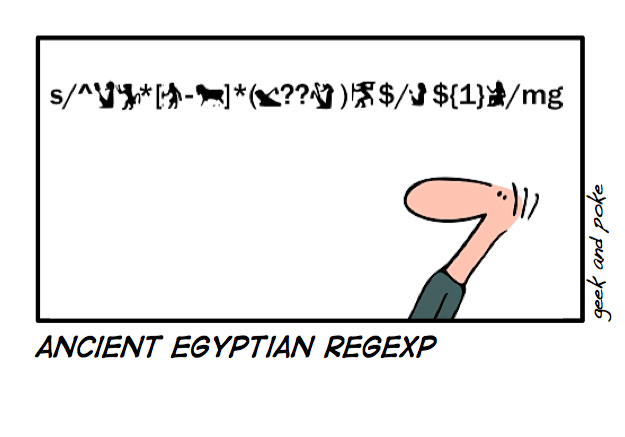

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Desarrollo del reto

In [ ]:
import pandas as pd
import re
import warnings
warnings.filterwarnings("ignore")

### Carga de DataFrame y exploración rápida

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/amazon_fine_food_reviews-clean.csv')
df.head(10)

,id,product_id,user_id,profile_name,helpfulness_numerator,helpfulness_denominator,score,time,summary,text
0,258510,B00168V34W,A1672LH9S1XO70,"Lorna J. Loomis ""Canadian Dog Fancier""",13,14,3,1266796800,"Misleading to refer to ""PODS""","This coffee does NOT come in individual ""PODS""..."
1,207915,B000CQID2Y,A42CJC66XO0H7,"Scott Schimmel ""A Butterfly Dreaming""",2,2,5,1279497600,Delicious,I was a little skeptical after looking at the ...
2,522649,B007TJGZ0Y,A16QZBG2UN6Z3X,"Toology ""Toology""",0,0,5,1335830400,One of my favs,Gloia Jeans Butter Toffee is one of my favorit...
3,393368,B000W7PUOW,A3J21CQZG60K35,Hsieh Pei Hsuan,2,2,5,1265673600,Tasty!!,My families and friends love Planters peanuts ...
4,178178,B002FX2IOQ,A1Z7XV6JU0EV8M,"Barbara ""Barbara""",1,6,1,1301788800,"Organic Valley White 1 % Milkfat Lowfat Milk, ...","Organic Valley White 1 % Milkfat Lowfat Milk, ..."
5,513585,B000VK33C6,A1H3K0Z1ADGNEH,"Nana ""Southern Cook""",0,0,5,1246147200,Dog loves it!,I adopted a rescue dog who had an allergy to c...
6,112283,B000LKUTIM,A2FUYQ0UBCZ08C,Lucia A. Dangelo,2,5,1,1330473600,Misadvertising,The ad for this non returnable item is so misl...
7,449895,B001E5DR5A,A3471OWD2JP88P,Kat,2,2,5,1234137600,Delicious!! Good variety of grains,"I purchased Greenmax ""Chinese Yam and Multi Gr..."
8,309838,B001I7AZZO,A3NOXOHTTQCTE0,"J. Gigowski ""blest mama""",3,3,5,1282262400,perfect pizza!,Two of my (four) boys is gluten-free. Pizza is...
9,333821,B0032B0BD0,AV8HGBJ1OORNF,Mrs. Murphy,0,0,5,1255132800,Love these chips!,These chips are great. I love the hot and spic...


In [ ]:
df_food = df['text']
df_food[:10]

0    This coffee does NOT come in individual "PODS"...
1    I was a little skeptical after looking at the ...
2    Gloia Jeans Butter Toffee is one of my favorit...
3    My families and friends love Planters peanuts ...
4    Organic Valley White 1 % Milkfat Lowfat Milk, ...
5    I adopted a rescue dog who had an allergy to c...
6    The ad for this non returnable item is so misl...
7    I purchased Greenmax "Chinese Yam and Multi Gr...
8    Two of my (four) boys is gluten-free. Pizza is...
9    These chips are great. I love the hot and spic...
Name: text, dtype: object

In [ ]:
df_food.shape

(14211,)

## Profilers

Es fácil caer enla tentación de querer optimizar nuestro código para que corra más rápido o para que consuma menos memoria. Para esto necesitamos familiarizarnos con distintas técnicas que nos pueden ayudar con esta tarea.  La técnica conocida como **software profiling** puede una aliada para conseguirlo.  Esta técnica nos ayudará a responder dónde es necesario optimizar nuestro código y si es el caso en qué partes hay que enfocarnos.

Muchas veces el esfuerzo de optimizar no vale la pena, sobretodo si solo lo ejecutaremos un par de veces o muy esporádicamente y el performance y el costo de poder de cómputo es irrelevante (p.e: corridas en infra on-premise).

Antes de optimizar nuestro código habrá que hacer un pequeño checklist para validar en dónde debemos trabajar para mejorar el performance de nuestro código.


1.   **Testing**: ¿Ya se ha probado que el código realmente haga aquello para lo cuál fue solicitado? - [(Para saber más)](https://realpython.com/tutorials/testing/)
2.   **Refactoring**: ¿Necesita nuestro código algunos ajustes para hacerlo más limpio y mantenible?  ¿Es nuestro código lo suficientemente ***Pythonic**? - [(Para saber más)](https://realpython.com/python-refactoring/)
3. **Profiling**: ¿Se han identificado las partes más ineficientes de nuestro código? - [(Para saber más)](https://realpython.com/python-timer/#finding-bottlenecks-in-your-code-with-profilers)


Antes de pensar en optimización hay que validar este pequeño checklist y estar seguros de que nuestro código cubre las necesidades de negocio y que los miembros del equipo (actuales y futuros) lo entienden y podrán darle mantenimiento.

*** [Pythonic](https://realpython.com/learning-paths/writing-pythonic-code/)**




Para iniciar con el proceso de **profiling** se recomienda hacer una análisis dinámico ejecutando el código, siempre que sea posible, con datos del mundo real en donde estará (o está) operando.

Dada que probaremos y otra vez lo recomendable comenzar con pequeñas muestras para la entrada de nuestros datos.  Esto nos ayudará a que las esperas por la ejecución de nuestro código no sean tan largas.

Una vez que nuestro código está listo par ajecutarse se puede utilizar alguno de los distintos **profilers** que están disponibles para **Python**.  Existen distintos tipos que pueden ayudarnos a mejorar nuestro código.  La siguiente no es una lista exhaustiva sino más bien desmostrativa de los tipos disponibles.



*   **Timers**: tales como las bibliotecas estandar *time* y *timeit* o la biblioteca *codetiming*
*   **Deterministic profilers**: tales como *profile*, *cProfile* y *line_profiler*
*   **Statistical profilers**: tales como *Pytrument* o la herramienta de CLI de Linux *perf*

Habiendo hecho esta pequeña intro, comencemos.



### Medir el tiempo de ejecución

En Python la forma más básica de medir el tiempo que toma la ejecución de un código llamando a funciones *timer* de la biblioteca *time*.

In [ ]:
import time

In [ ]:
def sleeper():
    time.sleep(1.75)


def spinlock():
    for _ in range(100_000_000):
        pass


for function in sleeper, spinlock:
    t1 = time.perf_counter(), time.process_time()
    function()
    t2 = time.perf_counter(), time.process_time()
    print(f"{function.__name__}()")
    print(f" Real time: {t2[0] - t1[0]:.2f} seconds")
    print(f" CPU time: {t2[1] - t1[1]:.2f} seconds")
    print()

sleeper()
 Real time: 1.75 seconds
 CPU time: 0.01 seconds

spinlock()
 Real time: 2.56 seconds
 CPU time: 2.55 seconds



Comencemos a validar qué código es más eficiente.  En primer lugar en téminos de tiempo de ejecución.
Recordemos que entre más pruebas hagamos más tiempo va a demandar el proceso.

Tomemos las dos **regex** de la búsqueda del patrón **food** que nos daban el mismo númerod e resultados.

In [ ]:
regex = r'\bfood\b'
df_food_fwm = df_food[df_food.str.contains(regex, case=True)]
df_food_fwm.shape

(1515,)

In [ ]:
regex = r'^.*?\bfood\b.*$'
df_food_fwm = df_food[df_food.str.contains(regex, case=True)]
df_food_fwm.shape

(1515,)

A continuación deamos cómo se compartan respecto al tiempo que consumen cada una.

In [ ]:
## Fuctions for code to test
def regex_1():
    regex = r'\bfood\b'
    df_food_fwm = df_food[df_food.str.contains(regex, case=True)]
    return df_food_fwm.shape

def regex_2():
    regex = r'^.*?\bfood\b.*$'
    df_food_fwm = df_food[df_food.str.contains(regex, case=True)]
    return df_food_fwm.shape

## Testing functions
def measure_time(function, acum):
    t1 = time.perf_counter(), time.process_time()
    function()
    t2 = time.perf_counter(), time.process_time()
    acum["real"] = acum["real"] + (t2[0] - t1[0])
    acum["CPU"] = acum["CPU"] + (t2[1] - t1[1])

def test_n_times(function, acum, test):
    for _ in range(test):
        measure_time(function, acum)
    print(f"{function.__name__}()")
    print(f"Real time: {acum['real'] / test:.2f} seconds")
    print(f"CPU time: {acum['CPU'] / test:.2f} seconds")
    print()

## Global params
time_regex = { "real":0, "CPU":0 }
test = 20

## Testing performance
for function in regex_1, regex_2:
    test_n_times(function, time_regex, test)

regex_1()
Real time: 0.16 seconds
CPU time: 0.16 seconds

regex_2()
Real time: 0.51 seconds
CPU time: 0.51 seconds




### Todas las evaluaciones que contengan las palabras **'horrible'** o **'terrible'**

Ahora vamos a utilizar un módulo que toma en cuenta el "ruido" que puede meter el sistema al momento de medir los tiempos de ejecución.  Este módulo considera la carga de trabajo que tenga el sistema operativo, el recolector de basura de Python, otros procesos corriendo de manera concurrente.

*timeit* ayuda a mitigar estos factores y provee una media más controlada del tiempod ejecución.

In [ ]:
regex = r'^.*\b(horrible|terrible)\b.*$'
df_food_horrible = df_food[df_food.str.contains(regex)]
df_food_horrible.shape

(216,)

In [ ]:
regex = r'^.*\b(ho|te)rrible\b.*$'
df_food_horrible = df_food[df_food.str.contains(regex)]
df_food_horrible.shape

(216,)

Las dos regex anteriores devuelven el mismo número de resultados.

Veamos primero cómo funciona el módulo *timeit* y luego lo aplicaremos a funciones basadas (por separado) en estas regex.

In [ ]:
from timeit import timeit

In [ ]:
code_to_test = """
# creating large arrays
arr1 = [3] * (5 ** 10)
arr2 = [4] * (3 ** 11)
arr1
"""

elapsed_time = timeit(code_to_test, number=10)
print(f'Elapsed time: {elapsed_time}')

Elapsed time: 0.7647385720010789


In [ ]:
elapsed_time = timeit(code_to_test, number=10)
print(f'Elapsed time: {elapsed_time}')

Elapsed time: 0.6411024410008395


Se puede observar que los tiempos que devuelve es muy probable que cambien.  Esto es debido a procesos que estén corriendo en paralelo y la compartición de recursos entre ellos y la ejecución del código a probar.

In [ ]:
## Functions for code to test
def regex_1():
    regex = r'^.*\b(horrible|terrible)\b.*$'
    df_food_horrible = df_food[df_food.str.contains(regex)]
    return df_food_horrible.shape

def regex_2():
      regex = r'^.*\b(ho|te)rrible\b.*$'
      df_food_horrible = df_food[df_food.str.contains(regex)]
      return df_food_horrible.shape

## Testing functions
def measure_time(function, test):
    total_time = timeit(function, number=test, globals=globals())
    print(f"{function.__name__}()")
    print(f"Average time is {total_time / test:.2f} seconds\n")

## Global params
test = 100

## Testing performance
for function in regex_1, regex_2:
    measure_time(function, test)


regex_1()
Average time is 0.32 seconds

regex_2()
Average time is 0.29 seconds



### Todas las evaluaciones que contengan **algún número de dos digitos**

Ahora veremos otro tipo de **profiler**, uno que nos permita tener más detalle de lo que está pasando en el sistema.

In [ ]:
import cProfile

In [ ]:
def regex_compleja_1():
    regex = r'^.*?(\D|\b|\s)\d{2}(\D|\b|\s).*$'
    df_food_2d = df_food[df_food.str.contains(regex)]
    return df_food_2d.shape

In [ ]:
def regex_compleja_2():
    regex = r'^.*?(?<!\d)\d{2}(?!\d).*$'
    df_food_2d = df_food[df_food.str.contains(regex)]
    return df_food_2d.shape

In [ ]:
cProfile.run('regex_compleja_1()')

         28926 function calls (28917 primitive calls) in 0.720 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(all)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(copyto)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1053(_handle_fromlist)
        1    0.000    0.000    0.720    0.720 <ipython-input-64-ff58389294a4>:1(regex_compleja_1)
        1    0.000    0.000    0.720    0.720 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 _exceptions.py:30(find_stack_level)
        1    0.000    0.000    0.000    0.000 abc.py:117(__instancecheck__)
        1    0.000    0.000    0.719    0.719 accessor.py:1127(contains)
        1    0.000    0.000    0.719    0.719 accessor.py:121(wrapper)
        1    0.000    0.000    0.001    0.001 accessor.py:255(_wrap_result)
        1

In [ ]:
cProfile.run('regex_compleja_2()')

         28841 function calls (28832 primitive calls) in 0.330 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.001    0.001 <__array_function__ internals>:177(all)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(copyto)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1053(_handle_fromlist)
        1    0.000    0.000    0.330    0.330 <ipython-input-65-0bcdc9738946>:1(regex_compleja_2)
        1    0.000    0.000    0.330    0.330 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 abc.py:117(__instancecheck__)
        1    0.000    0.000    0.328    0.328 accessor.py:1127(contains)
        1    0.000    0.000    0.328    0.328 accessor.py:121(wrapper)
        1    0.000    0.000    0.001    0.001 accessor.py:255(_wrap_result)
        1    0.000    0.000    0.000    0.000 base.py:313(shape)
        7    0.000    0.00

### Buscar cuellos de botella por línea de código

Otra opción es buscar cuellos de botella por líneas de código.

Para este caso vamos a utilizar el módulo **line_profiler**

In [ ]:
!pip install line_profiler

In [ ]:
from line_profiler import LineProfiler

In [ ]:
lp = LineProfiler()
lp.add_function(regex_compleja_1)
lp.run('regex_compleja_1()')
lp.print_stats()

Timer unit: 1e-09 s

Total time: 0.729635 s
File: <ipython-input-64-ff58389294a4>
Function: regex_compleja_1 at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def regex_compleja_1():
     2         1       7877.0   7877.0      0.0      regex = r'^.*?(\D|\b|\s)\d{2}(\D|\b|\s).*$'
     3         1  729615061.0    7e+08    100.0      df_food_2d = df_food[df_food.str.contains(regex)]
     4         1      12289.0  12289.0      0.0      return df_food_2d.shape



In [ ]:
lp = LineProfiler()
lp.add_function(regex_compleja_2)
lp.run('regex_compleja_2()')
lp.print_stats()

Timer unit: 1e-09 s

Total time: 0.316335 s
File: <ipython-input-65-0bcdc9738946>
Function: regex_compleja_2 at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def regex_compleja_2():
     2         1       1693.0   1693.0      0.0      regex = r'^.*?(?<!\d)\d{2}(?!\d).*$'
     3         1  316320948.0    3e+08    100.0      df_food_2d = df_food[df_food.str.contains(regex)]
     4         1      12036.0  12036.0      0.0      return df_food_2d.shape



### Recordando cómo capturar las cadenas que coinciden con nuestra regex.

 Todas las evaluaciones que contengan **algún número de dos digitos**

 Primer patrón: buscando los dígitos delimitados por espacios.

In [ ]:
regex = r'^.*?\s\d{2}\s.*$'
df_food_2d = df_food[df_food.str.contains(regex)]
df_food_2d.shape

(1415,)

Capturamos las cadenas que coinciden y dejamos solo una ocurrencia por cada una de ellas para comparar los patrones que encontramos con cada **regex**

In [ ]:
regex = r'^.*(.+?\s\d{2}\s.+?).*$'
ser_0 = df_food.str.extract(regex)
set_0 = set(ser_0[0].unique())
len(set_0)

964

Segundo patrón: buscando los dígitos por delimitador de palabra.

In [ ]:
regex = r'^.*?\b\d{2}\b.*$'
df_food_2d = df_food[df_food.str.contains(regex)]
df_food_2d.shape

(2423,)

Capturamos las cadenas que coinciden y dejamos solo una ocurrencia por cada una de ellas para comparar los patrones que encontramos con cada **regex**

In [ ]:
regex = r'^.*(.+?\b\d{2}\b.+?).*$'
ser_1 = df_food.str.extract(regex)
set_1 = set(ser_1[0].unique())
len(set_1)

556

Comparando los dos sets para ver las diferencias.
En caso de ser iguales el resultado debería de ser un set vacío.

In [ ]:
set_0_1 = set_1.difference(set_0)
set_0_1

{' 04/',
 ' 09,',
 ' 10 ',
 ' 10"',
 ' 10%',
 ' 10)',
 ' 10+',
 ' 10,',
 ' 10-',
 ' 10.',
 ' 10:',
 ' 10<',
 ' 11 ',
 ' 11%',
 ' 11,',
 ' 11-',
 ' 11.',
 ' 11/',
 ' 12 ',
 ' 12"',
 ' 12#',
 ' 12%',
 ' 12)',
 ' 12,',
 ' 12-',
 ' 12.',
 ' 13 ',
 ' 13%',
 ' 13)',
 ' 13,',
 ' 13.',
 ' 14 ',
 ' 14)',
 ' 14.',
 ' 15 ',
 ' 15#',
 ' 15%',
 ' 15)',
 ' 15,',
 ' 15-',
 ' 15.',
 ' 15/',
 ' 16 ',
 ' 16%',
 ' 16)',
 ' 16+',
 ' 16,',
 ' 16-',
 ' 16.',
 ' 17 ',
 ' 17+',
 ' 17.',
 ' 18 ',
 ' 18+',
 ' 18,',
 ' 18-',
 ' 19 ',
 ' 19.',
 ' 20 ',
 ' 20$',
 ' 20%',
 " 20'",
 ' 20)',
 ' 20+',
 ' 20,',
 ' 20-',
 ' 20.',
 ' 20:',
 ' 20<',
 ' 21 ',
 ' 21)',
 ' 22 ',
 ' 22%',
 ' 22-',
 ' 23 ',
 ' 23-',
 ' 23<',
 ' 24 ',
 ' 24)',
 ' 24-',
 ' 24.',
 ' 24/',
 ' 24<',
 ' 25 ',
 ' 25%',
 ' 25+',
 ' 25-',
 ' 25.',
 ' 26 ',
 ' 26,',
 ' 27 ',
 ' 28 ',
 ' 28,',
 ' 28-',
 ' 28.',
 ' 29 ',
 ' 29,',
 ' 30 ',
 ' 30%',
 ' 30)',
 ' 30+',
 ' 30-',
 ' 30.',
 ' 31,',
 ' 31.',
 ' 32 ',
 ' 32%',
 ' 32-',
 ' 32.',
 ' 33 ',
 ' 33%',
 

## Limpieza de datos utilizando **regex**

### Convertir columnas de interés en minúsculas **text**

In [ ]:
df_minus = df.copy()
df_minus['text'] = df_minus['text'].str.lower()

###  🥇 Limpiar datos de acuerdo a

In [ ]:
def limpia_nlp():
    df_minus = df.copy()
    df_minus['text'] = df_minus['text'].str.lower()
    # Eliminar etiquetas <a>
    df_minus['text'] = df_minus['text'].str.replace('< *?a .*?>.*?< *a *>', '')
    # Eliminar etiquetas <span>
    df_minus['text'] = df_minus['text'].str.replace('< *?span .*?>.*?< */?span *>', '')
    # Eliminar etiquetas <p>
    df_minus['text'] = df_minus['text'].str.replace('< *p *>', '')
    # Eliminar etiquetas <br/>
    df_minus['text'] = df_minus['text'].str.replace('< *?br *?/? *?>', '')
    # Eliminar símbolos
    df_minus['text'] = df_minus['text'].str.replace('[$%?!&_;:^\"\'.,/\(\)\\\{\}-]', '')
    # Reemplazar secuencias de espacios por solo espacio
    df_minus['text'] = df_minus['text'].str.replace(' \s+', ' ')
    df_minus['text']

### Profiling basado en el uso de memoria

In [ ]:
!pip install memory_profiler

In [ ]:
import memory_profiler

In [ ]:
memory_profiler.profile(limpia_nlp)()

ERROR: Could not find file <ipython-input-35-45dbc6ca3622>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.


### Descubrir las partes más lentas de ejecutar

Para saber más [click](https://pyinstrument.readthedocs.io/en/latest/home.html)

In [ ]:
!pip install pyinstrument

In [ ]:
from pyinstrument import Profiler

In [ ]:
with Profiler(interval=0.1) as profiler:
    limpia_nlp()

profiler.print()


  _     ._   __/__   _ _  _  _ _/_   Recorded: 02:59:31  Samples:  2
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.298     CPU time: 0.296
/   _/                      v4.5.3

Program: /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-ad789c5c-ef7a-4eba-9101-e68d6f5ce3ff.json

0.200 <cell line: 1>  <ipython-input-77-9693a8d14da7>:1
└─ 0.200 limpia_nlp  <ipython-input-35-45dbc6ca3622>:1
   ├─ 0.100 CachedAccessor.__get__  pandas/core/accessor.py:178
   │     [3 frames hidden]  pandas
   │        0.100 _validate  pandas/core/strings/accessor.py:197
   └─ 0.100 StringMethods.wrapper  pandas/core/strings/accessor.py:121
         [6 frames hidden]  pandas, <built-in>
            0.100 Pattern.sub  <built-in>




In [ ]:
profiler.open_in_browser()

'/tmp/tmp09vr1rk7.html'

### Profiler con "huella" baja

Para saber más [click](https://pypi.org/project/yappi/)

In [ ]:
!pip install yappi

In [ ]:
import yappi

In [ ]:
yappi.set_clock_type("cpu")
with yappi.run(builtins=True):
    limpia_nlp()

print("\n--------- Function Stats -----------")
yappi.get_func_stats().print_all()


--------- Function Stats -----------

Clock type: CPU
Ordered by: totaltime, desc

name                                  ncall  tsub      ttot      tavg      
..10/threading.py:288 Condition.wait  30     0.000762  35.43761  1.181254
..cquire' of '_thread.lock' objects>  152..  35.43633  35.43636  0.233134
..recv' of '_socket.socket' objects>  4      4.075782  4.075788  1.018947
..ectors.py:452 EpollSelector.select  3      0.000068  2.265047  0.755016
.. 'poll' of 'select.epoll' objects>  3      2.263861  2.263869  0.754623
..nput-35-45dbc6ca3622>:1 limpia_nlp  2      0.003491  1.310915  0.655457
..essor.py:121 StringMethods.wrapper  14     0.000123  1.271112  0.090794
..t_array.py:39 PandasArray._str_map  14     0.000456  1.257073  0.089791
..ssor.py:1328 StringMethods.replace  12     0.000591  1.240029  0.103336
pandas._libs.lib.map_infer_mask       14     0.229455  1.233059  0.088076
..ay.py:141 PandasArray._str_replace  12     0.000185  1.228109  0.102342
..rings/object_array.py:16

In [ ]:
print("\n--------- Thread Stats -----------")
yappi.get_thread_stats().print_all()


--------- Thread Stats -----------

name           id     tid              ttot      scnt        
_MainThread    0      132089892601856  72.29444  42        
WriterThread   5      132089451628096  15.78053  21        
..mmandThread  3      132089227765312  12.87137  8         
..AliveThread  4      132089219372608  6.802617  9         
Thread         2      132089202587200  5.925145  11        
ReaderThread   7      132089236158016  4.079480  5         
Thread         1      132089731192384  2.267061  4         
..tPollerUnix  6      132089474704960  0.801446  3         


In [ ]:
print("\nYappi Backend Types: ",yappi.BACKEND_TYPES)
print("Yappi Clock Types: ", yappi.CLOCK_TYPES)


Yappi Backend Types:  {'NATIVE_THREAD': 0, 'GREENLET': 1}
Yappi Clock Types:  {'WALL': 0, 'CPU': 1}
